In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ML/credito_bank/data_raw/credit_scoring.csv")

In [3]:
df.shape

(750000, 16)

In [4]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'mau'],
      dtype='object')

In [6]:
df.dtypes.value_counts()

,count
object,8
int64,4
float64,3
bool,1


In [7]:
df.dtypes

,0
Unnamed: 0,int64
data_ref,object
index,int64
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object


In [10]:
df.isna().sum()

,0
Unnamed: 0,0
data_ref,0
index,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0


<Axes: >

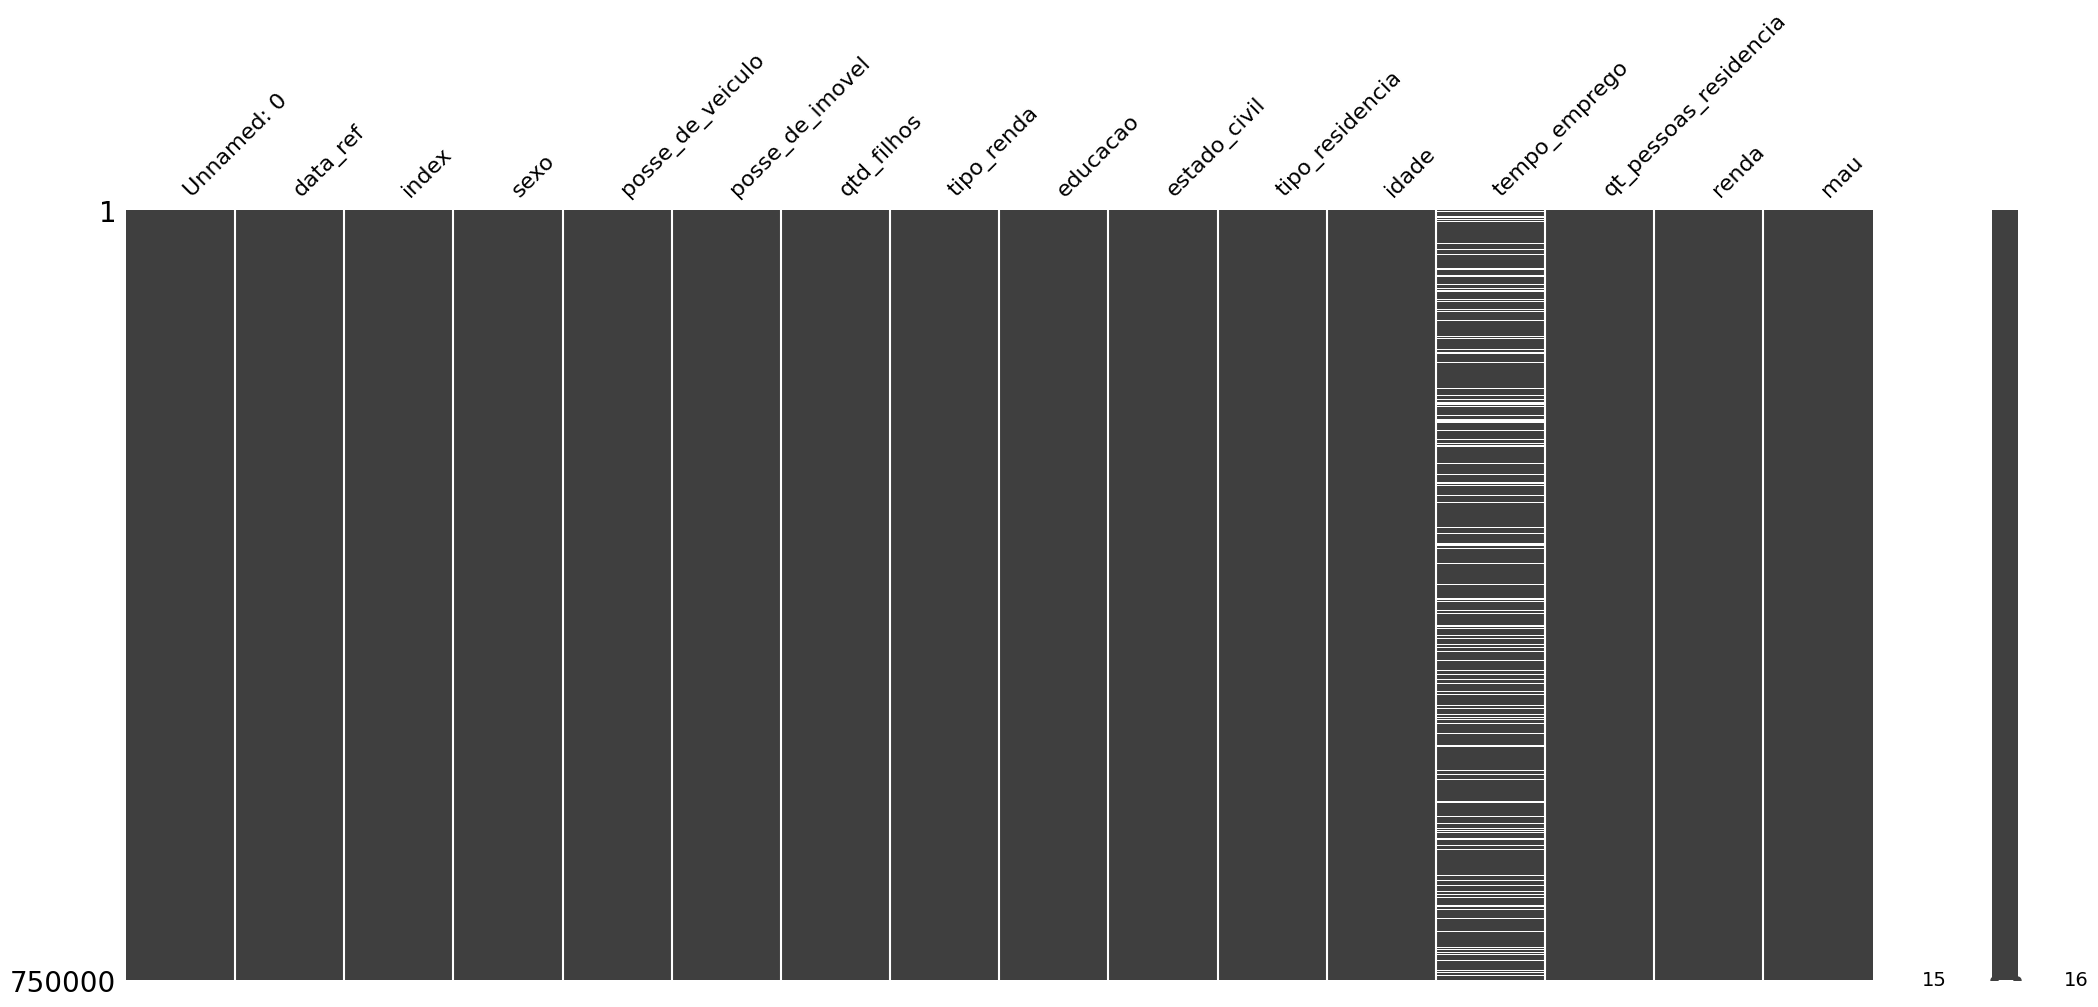

In [11]:
msno.matrix(df)

In [19]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [22]:
sexo =df["sexo"].unique()
veiculo =df["posse_de_veiculo"].unique()
tipo_renda =df["tipo_renda"].unique()
educacao =df["educacao"].unique()
estado_civil =df["estado_civil"].unique()
tipo_residencia =df["tipo_residencia"].unique()
imovel = df["posse_de_imovel"].unique()

mau = df["mau"].unique()

print(f"Categorias identificadas na variavel sexo: {sexo}.")
print(f"Categorias identificadas na variavel posse_de_veiculo: {veiculo}.")
print(f"Categorias identificadas na variavel tipo_renda: {tipo_renda}.")
print(f"Categorias identificadas na variavel educacao: {educacao}.")
print(f"Categorias identificadas na variavel estado_civil: {estado_civil}.")
print(f"Categorias identificadas na variavel tipo_residencia: {tipo_residencia}.")
print( f"Categorias identificadas na variavel posse_de_imovel: {imovel}")
print(f"Categorias identificadas na variavel mau: {mau}.")

Categorias identificadas na variavel sexo: ['F' 'M'].
Categorias identificadas na variavel posse_de_veiculo: ['N' 'S'].
Categorias identificadas na variavel tipo_renda: ['Empresário' 'Assalariado' 'Servidor público' 'Pensionista' 'Bolsista'].
Categorias identificadas na variavel educacao: ['Médio' 'Superior incompleto' 'Superior completo' 'Fundamental'
 'Pós graduação'].
Categorias identificadas na variavel estado_civil: ['Solteiro' 'Casado' 'União' 'Separado' 'Viúvo'].
Categorias identificadas na variavel tipo_residencia: ['Casa' 'Com os pais' 'Aluguel' 'Comunitário' 'Governamental' 'Estúdio'].
Categorias identificadas na variavel posse_de_imovel: ['N' 'S']
Categorias identificadas na variavel mau: [False  True].


In [24]:
sexo_map = {"F":0, "M":1}
veiculo_map = {"N":0, "S":1}
imovel_map = {"N":0, "S":1}

mau_map = {False:0, True:1}

tipo_renda_map = {"Empresário":0, "Servidor público":1, "Pensionista":2, "Bolsista":3, "Assalariado":4}
educacao_map = {"Médio":0, "Superior incompleto":1, "Superior completo":2, "Fundamental":3, "Pós graduação":4}
estado_civil_map = {"Casado":0, "Solteiro":1, "Separado":2, "Viúvo":3, "União":4}
tipo_residencia_map = {"Casa":0, "Com os pais":1, "Aluguel":2, "Comunitário":3, "Governamental":4, "Estúdio":5}




In [25]:
df_map = df.copy()

df_map["sexo"] = df_map["sexo"].map(sexo_map)
df_map["posse_de_veiculo"] = df_map["posse_de_veiculo"].map(veiculo_map)
df_map["posse_de_imovel"] = df_map["posse_de_imovel"].map(imovel_map)

df_map["mau"] = df_map["mau"].map(mau_map)

df_map["tipo_renda"] = df_map["tipo_renda"].map(tipo_renda_map)
df_map["educacao"] = df_map["educacao"].map(educacao_map)
df_map["estado_civil"] = df_map["estado_civil"].map(estado_civil_map)
df_map["tipo_residencia"] = df_map["tipo_residencia"].map(tipo_residencia_map)

In [26]:
df_map.dtypes

,0
Unnamed: 0,int64
data_ref,object
index,int64
sexo,int64
posse_de_veiculo,int64
posse_de_imovel,int64
qtd_filhos,int64
tipo_renda,int64
educacao,int64
estado_civil,int64


In [30]:
df_map.drop(["Unnamed: 0", "data_ref"], axis=1, inplace = True)
df_map.columns

Index(['index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mau'],
      dtype='object')

In [32]:
df_map.dropna(inplace=True)

In [34]:
df_map.isna().sum()

,0
index,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0
idade,0


In [35]:
caminho_upload = "/content/drive/MyDrive/ML/credito_bank/data_procesed"
nome_arquivo = "db_model_risck.csv"

caminho_completo = os.path.join(caminho_upload, nome_arquivo)

df_map.to_csv(caminho_completo, index=False)